# Prediction of minimimum optimal number of clusters


### We will be using sklearn's cluster module to solve this problem

Importing libraries and loading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


As our data set is not very large We will first try to find number of optimal clusters. we will be using silhouette score to determine the optimal numbe rof clusters.

Silhouette score for cluster size 2 is 0.681046169211746
Silhouette score for cluster size 3 is 0.5528190123564091
Silhouette score for cluster size 4 is 0.4980505049972866
Silhouette score for cluster size 5 is 0.4887488870931048


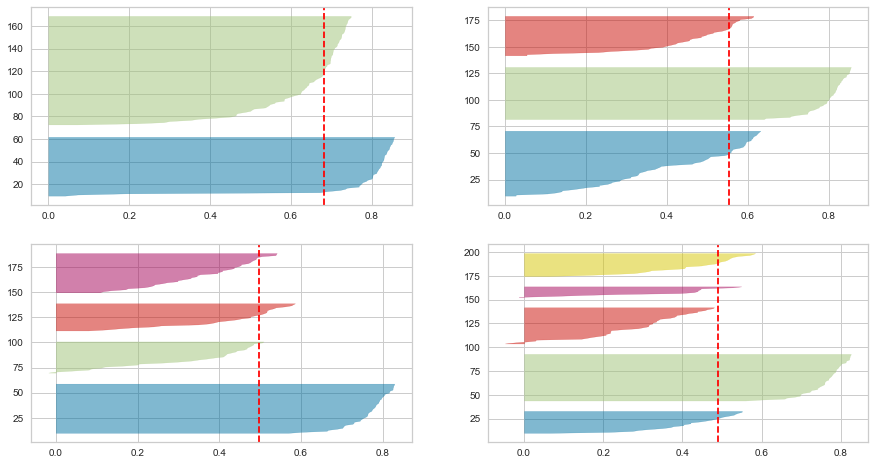

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(iris_df)

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    km.fit_predict(iris_df)
    score = silhouette_score(iris_df, km.labels_, metric='euclidean')
    print('Silhouette score for cluster size {} is {}'.format(i,score))
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(iris_df)

Here is the Silhouette analysis done on the above plots to select an optimal value for cluster vlaues of 2,3,4,5. We can observe there is wide flacutation of size when the cluster size is of 4 or 5 with presence of cluster below avergae sihouetter score. So we may chose a cluster size of 3 for our puropse. 

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

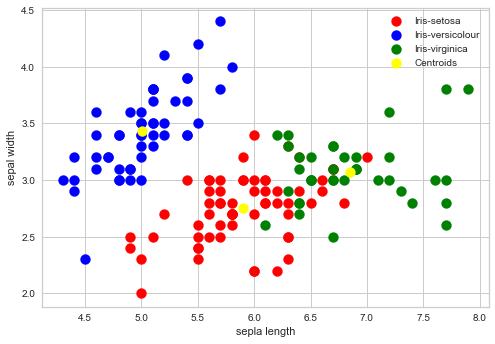

In [32]:
# Visualising the clusters - based on the first two columns
plt.scatter(x[y_kmeans == 0, 0 ], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('sepla length')
plt.ylabel('sepal width')
plt.legend()

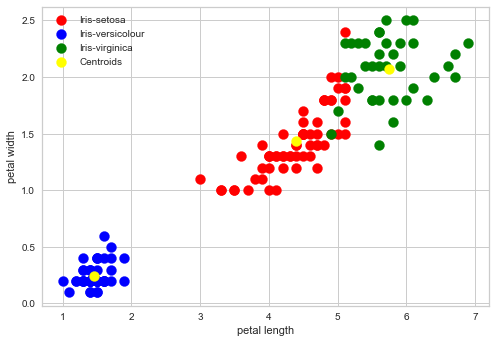

In [33]:
# Visualising the clusters - based on the last two columns
plt.scatter(x[y_kmeans == 0, 2 ], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()